<a href="https://colab.research.google.com/github/ElenaBara21/Portfolio/blob/main/SLF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

In [ ]:
import scipy.signal.signaltools


def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]


scipy.signal.signaltools._centered = _centered

<IPython.core.display.Javascript object>

## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading the dataset

In [ ]:
dt = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

#### Checking the shape of the dataset

In [ ]:
dt.shape
print("There are", dt.shape[0], "rows and", dt.shape[1], "columns.")

There are 3454 rows and 15 columns.


<IPython.core.display.Javascript object>

* The dataset contains information (15 attributes) about 3454 mobile phones 

#### Displaying the first few rows of the dataset

In [ ]:
dt.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

* The dataset contains information about different mobile phones
*

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

* There are 11 numeric (*float* and *int* type) and 4 string (*object* type) columns in the data

### Statistical summary of the dataset

In [ ]:
dt.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

* there are min 0.01gb int_memory and max 1024 gb
* ram min 0.02 to max 12 GB
* release year min 2013 to max 2020
* days used min 91 day to 1024days
* normalized_new_price in euros min 1.53687 to 6.61943
normalized_used_price in euros min 2.90142 to max 7.84784

### Checking for duplicate values

In [ ]:
dt.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the data

### Checking for missing values

In [ ]:
dt.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in the next columns: main_camera_mp,    selfie_camera_mp,  int_memory, ram, battery, weight

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = dt.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

##### 1. What does the distribution of normalized used device prices look like?

#### Normalized used price

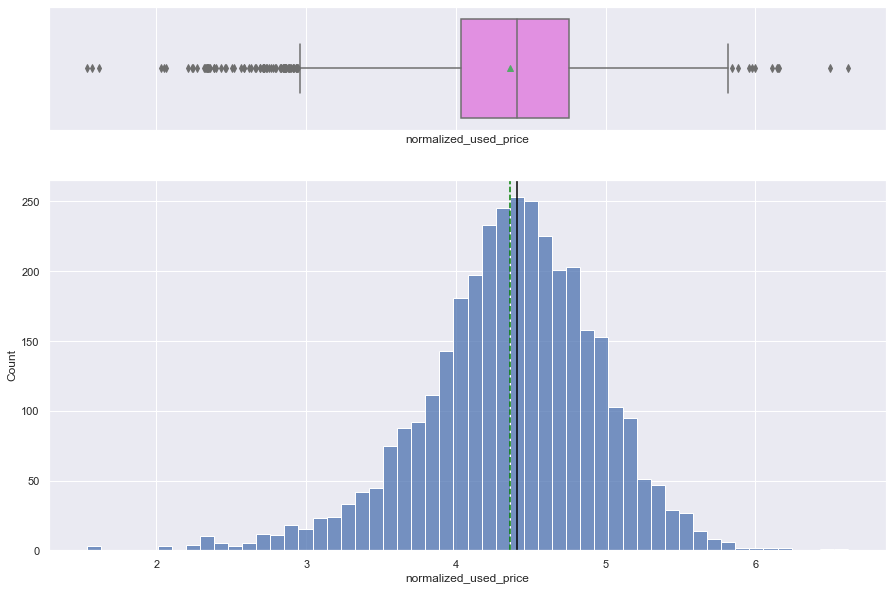

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "normalized_used_price")

* The price of used phones approximately follows a normal distribution

##### 2. What percentage of the used device market is dominated by Android devices?

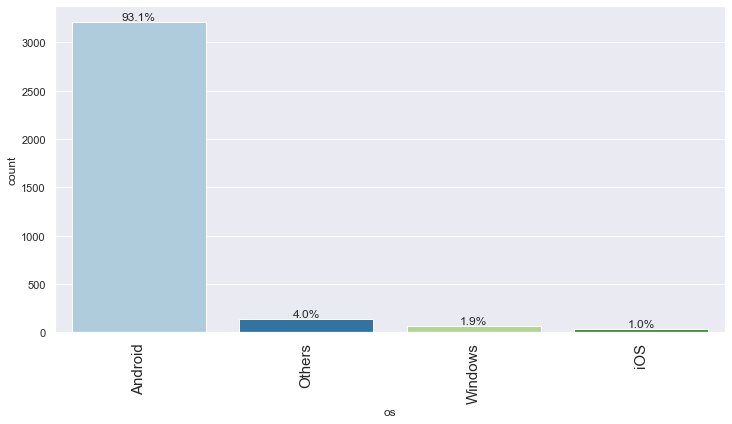

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "os", perc=True, n=10)

* Android dominating with 93.1%

##### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

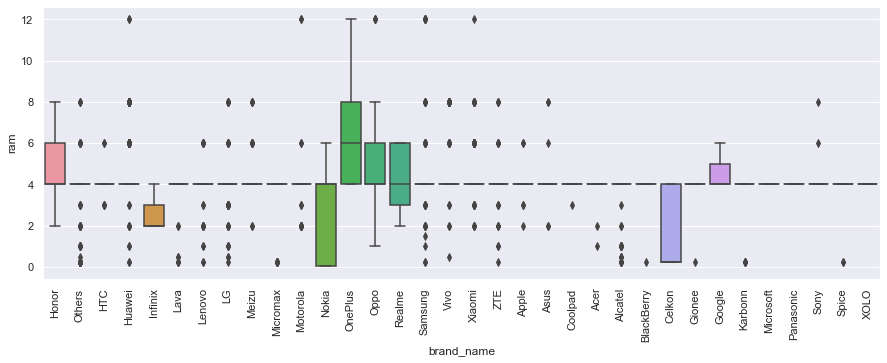

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
# sns.boxplot(data=df, x="ram", y="brand_name")
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* OnePlus is the leader here which offer  6gb in average

##### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [ ]:
weight_ph = df.loc[df["battery"] > 4500]
weight_ph.shape

(341, 15)

<IPython.core.display.Javascript object>

* 341 phones with battery >4500mAh

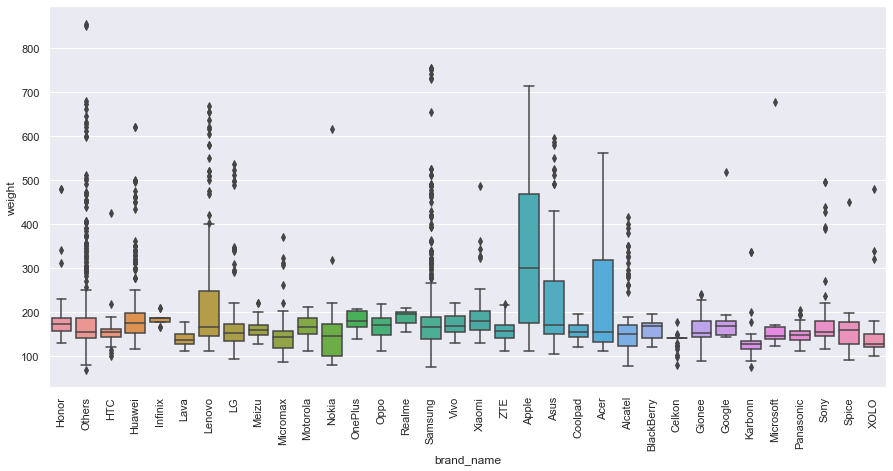

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

* Apple has the biggest avg weight 300g

##### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?


In [ ]:
# we need to convert cm to inches and find greater than 6 inches

df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

<IPython.core.display.Javascript object>

* There are 1099 mobile phones with the screen larger than 6

<Figure size 1080x720 with 0 Axes>

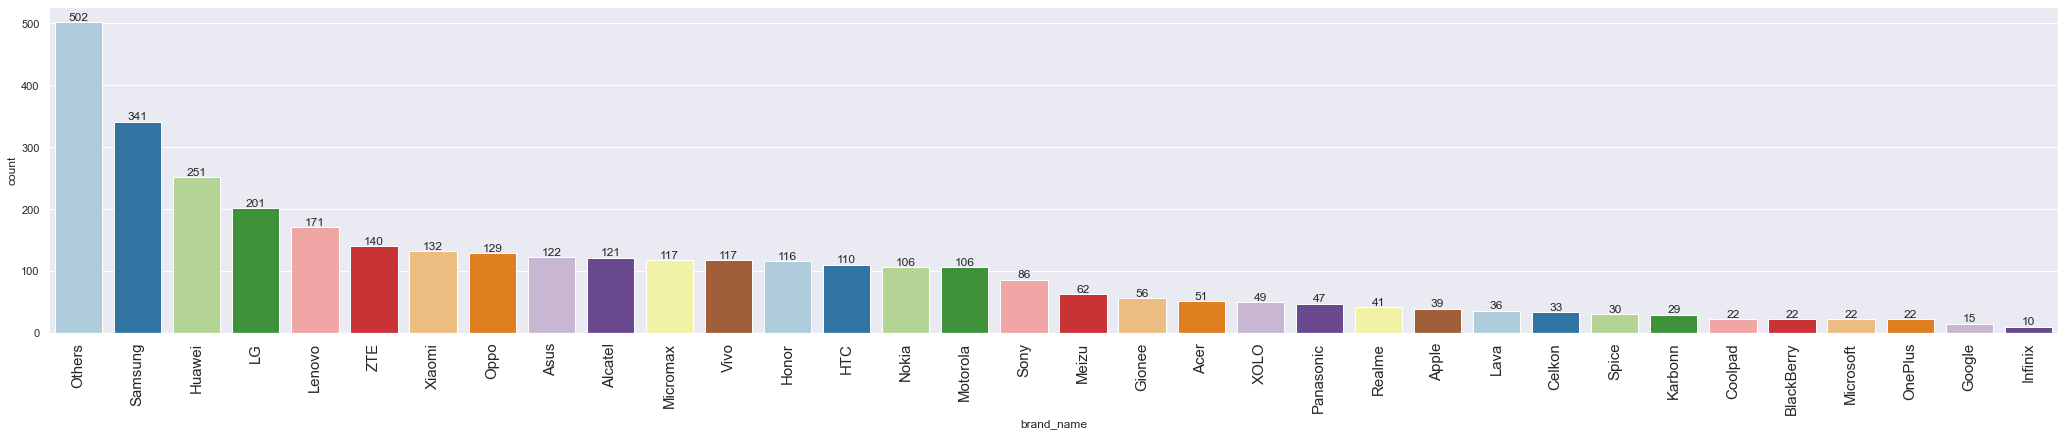

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 10))
labeled_barplot(df, "brand_name", "screen_size")

##### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?


In [ ]:
s_cam = df.loc[df["selfie_camera_mp"] > 8]
s_cam.shape

(655, 15)

<IPython.core.display.Javascript object>

* there are 655 devices with cam > 8

<Figure size 1080x720 with 0 Axes>

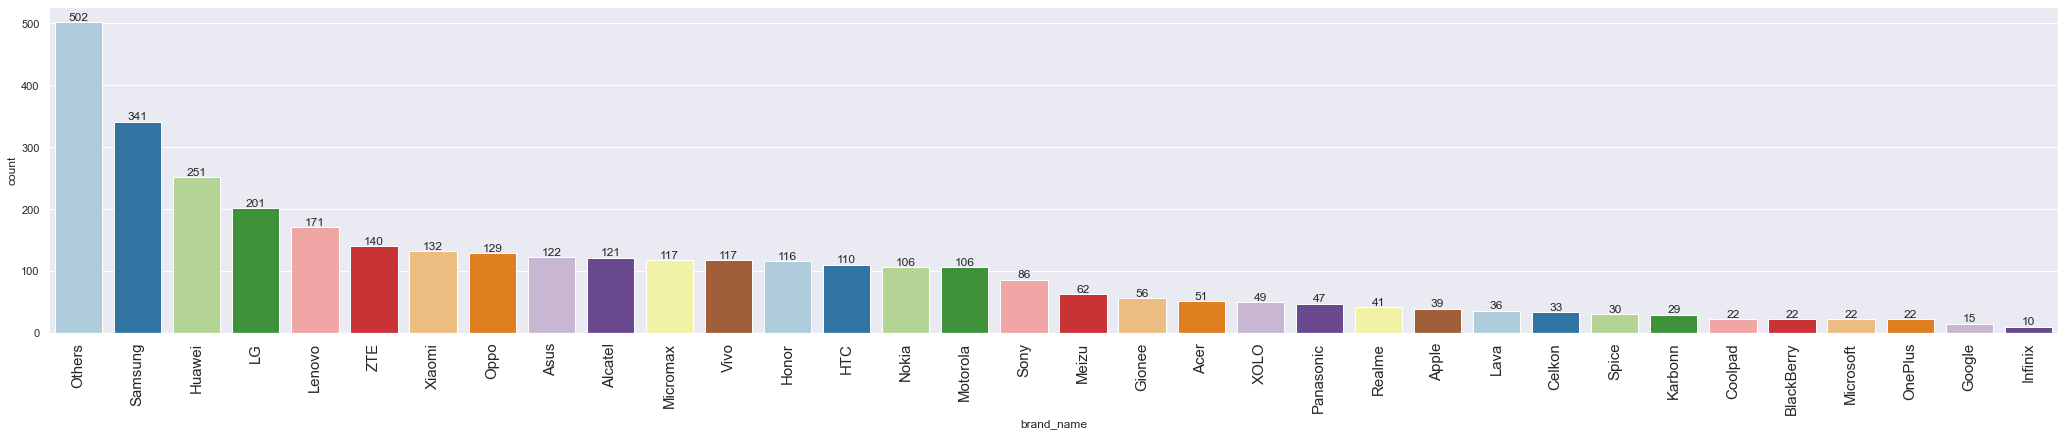

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 10))
labeled_barplot(df, "brand_name", "selfie_camera_mp")

##### 7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols


['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

<IPython.core.display.Javascript object>

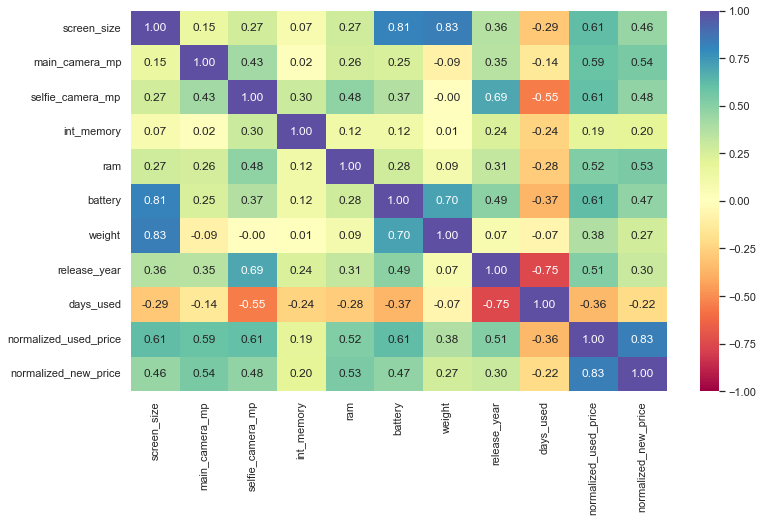

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is a positive correlation between screen)size and battery and weight as well as used and new normalizes prices

### Detailed Exploratory Data Analysis (EDA)

#### Univariate Analysis

#### RAM

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'),
  Text(33, 0, 'XOLO')])

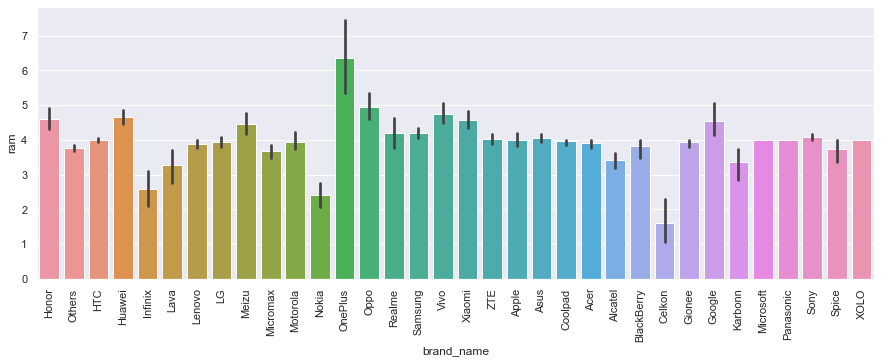

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="brand_name", y="ram", data=df)
plt.xticks(rotation=90)

* One plus brand offers bigger ram than others brands

#### OS vs Ram
* which brand offers more ram

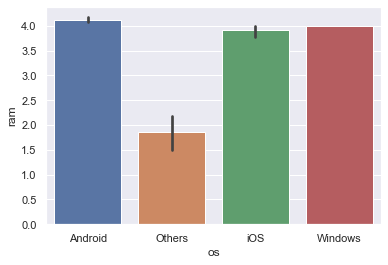

<IPython.core.display.Javascript object>

In [ ]:
sns.barplot(x="os", y="ram", data=df)

* Android offers more ram

#### battery

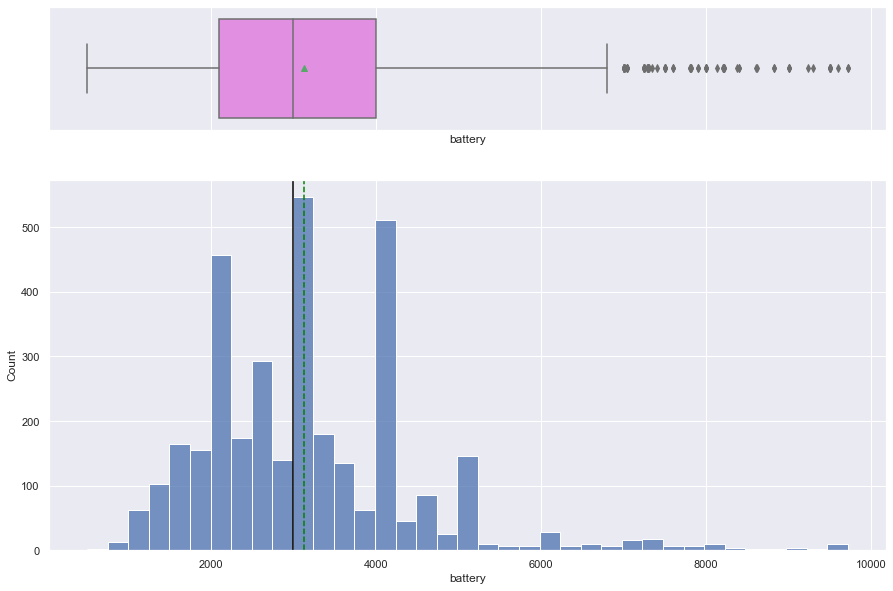

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "battery")

battery in average are 3000mA

#### brand_name

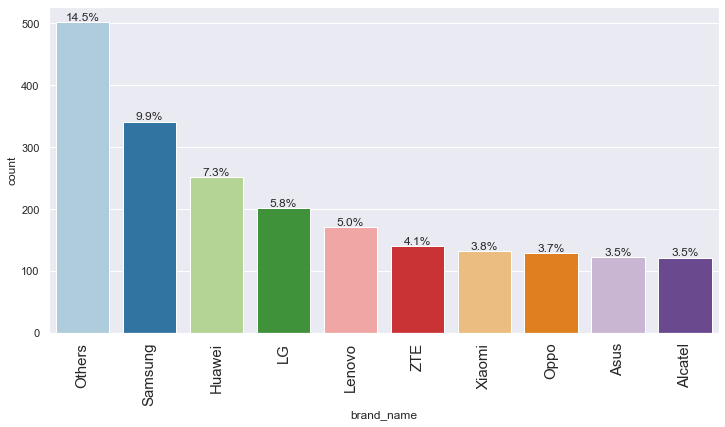

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

14.5 % of others brand name are the most popular

#### os

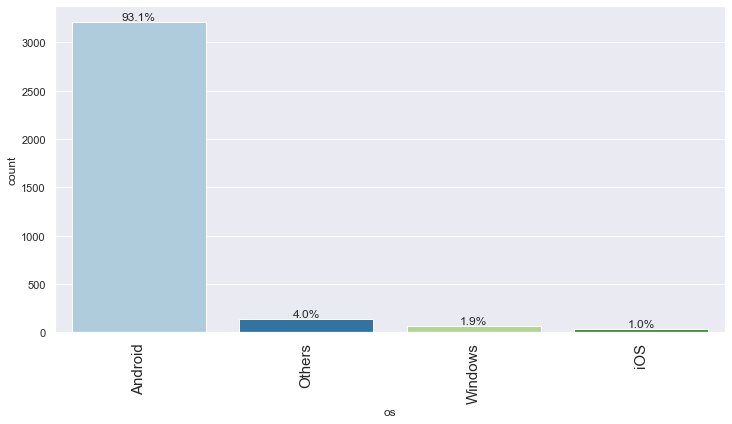

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "os", perc=True, n=10)

* Android os is the leader here with 93%

#### 4g

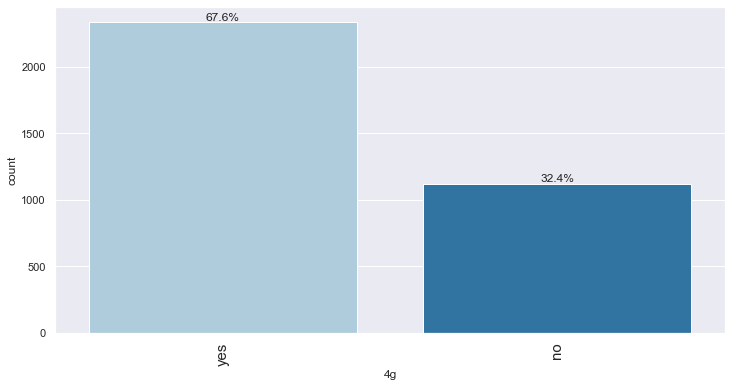

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "4g", perc=True, n=10)

* 67% of devices has 4g

#### 5g

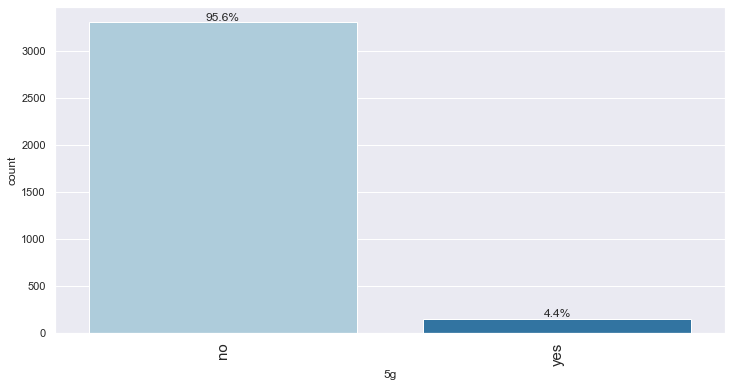

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "5g", perc=True, n=10)

95 % of devices doesnt have 5g

#### release year

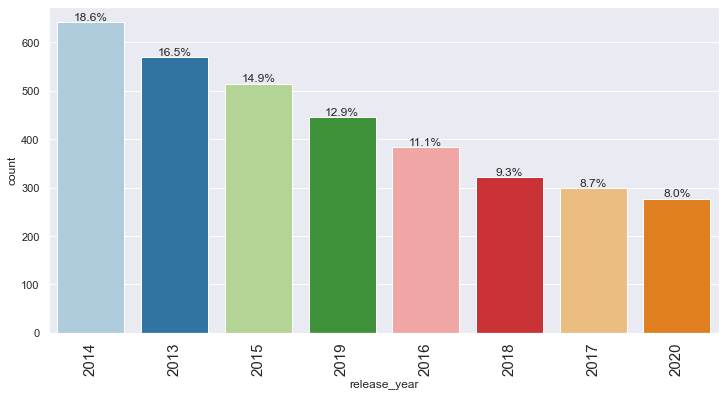

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "release_year", perc=True, n=10)

Release year of devices is 2014  18.6%

#### days_used

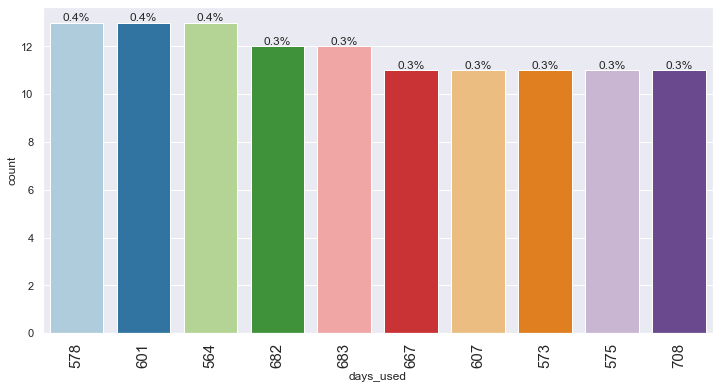

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "days_used", perc=True, n=10)

0.4% were used 578, 601, 564 days

####  Percentage of the used device market is dominated by Android

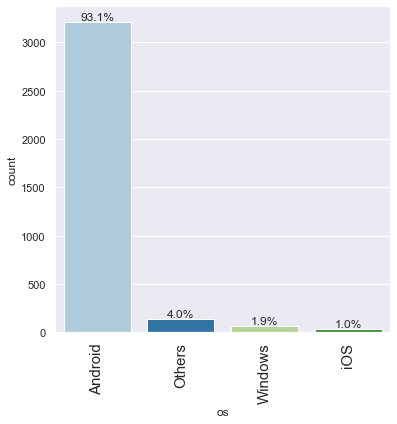

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "os", perc=True)

93.1% dominated by android

### Bivariate Analysis

#### Correlation Check

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variabl
num_cols.remove("release_year")

<IPython.core.display.Javascript object>

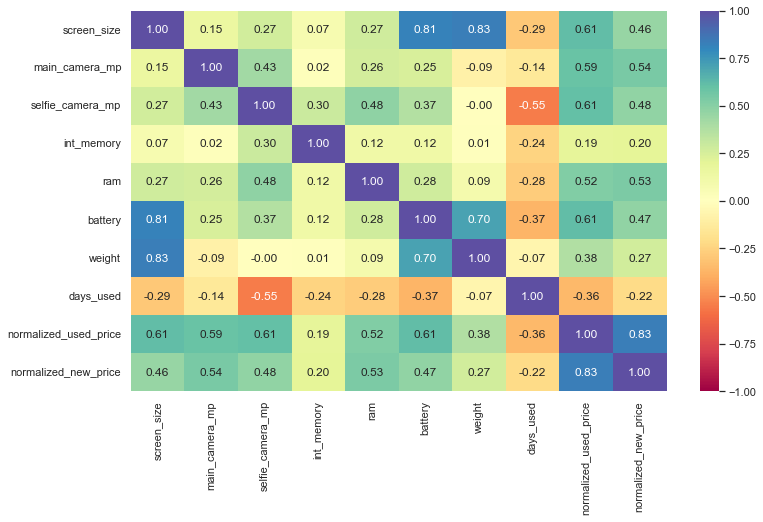

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is a positive correlation between screen)size and battery and weight as well as used and new normalizes prices

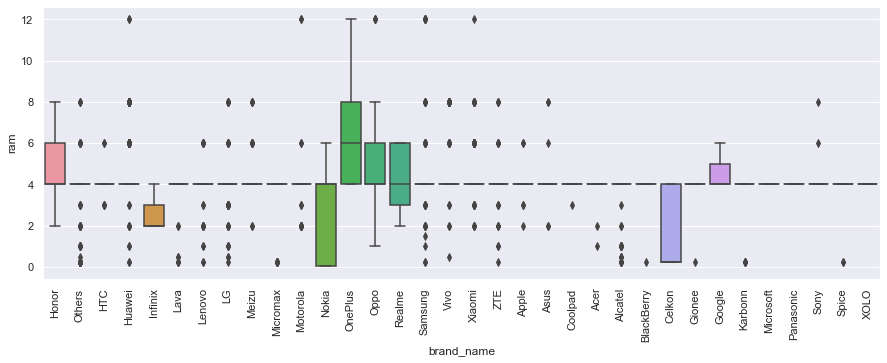

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* the brand OnePlus has the highest ram, still there are few outliers the data

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing value treatment

In [ ]:
# we first create a copy of the data to avoid changes to it
df2 = df.copy()

<IPython.core.display.Javascript object>

In [ ]:
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in:

Main_camera_mp 179, 
selfie_camera_mp 2, 
int_memory 4, 
ram 4, 
battery 6, 
weight 7


#### Let's check if missing value connected in any way:

#### 1.Missing value treatment for main_camera_mp

In [ ]:
df2.loc[df2["main_camera_mp"].isnull() == True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


<IPython.core.display.Javascript object>

#### 2.Missing value treatment for selfie_camera_mp

In [ ]:
df2.loc[df2["selfie_camera_mp"].isnull() == True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1080,Google,Android,15.32,yes,no,12.2,NaN,64.0,4.0,3430.0,184.0,2018,475,5.573826,6.865974
1081,Google,Android,12.83,yes,no,12.2,NaN,64.0,4.0,2915.0,148.0,2018,424,4.464988,6.745083


<IPython.core.display.Javascript object>

#### 3.Missing value treatment for int_memory

In [ ]:
df2.loc[df2["int_memory"].isnull() == True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
117,Nokia,Others,5.18,yes,no,0.3,0.0,NaN,0.02,1200.0,86.5,2019,234,2.721295,3.688379
2035,Nokia,Others,5.18,no,no,5.0,0.0,NaN,0.03,1020.0,157.0,2019,501,2.343727,3.420346
2064,Nokia,Others,5.18,no,no,0.3,0.0,NaN,0.02,1100.0,78.4,2015,559,2.587012,3.378611
2092,Nokia,Others,7.62,no,no,5.0,0.0,NaN,0.02,1010.0,100.0,2013,1043,3.535728,4.370586


<IPython.core.display.Javascript object>

#### 4.Missing value treatment for ram

In [ ]:
df2.loc[df2["ram"].isnull() == True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.0,111.4,2013,1001,3.827771,4.605770


<IPython.core.display.Javascript object>

#### 5.Missing value treatment for battery

In [ ]:
df2.loc[df2["battery"].isnull() == True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,81.0,2016,815,2.718660,3.374511
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905


<IPython.core.display.Javascript object>

#### 6.Missing value treatment for weight

In [ ]:
df2.loc[df2["weight"].isnull() == True]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,3.837084,4.347176
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015,838,3.707210,4.791733
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015,1045,4.184642,4.785406


<IPython.core.display.Javascript object>

#### Observations
We can see that all missing values has no relation between

#### Lets see the count and the percentage of missing values in each column

In [ ]:
pd.DataFrame(
    {
        "Count": df2.isnull().sum()[df2.isnull().sum() > 0],
        "Percentage": (df2.isnull().sum()[df2.isnull().sum() > 0] / df2.shape[0]) * 100,
    }
)

,Count,Percentage
main_camera_mp,179,5.182397
selfie_camera_mp,2,0.057904
int_memory,4,0.115808
ram,4,0.115808
battery,6,0.173712
weight,7,0.202664


<IPython.core.display.Javascript object>

* there are 179 missing value for the main camera which is 5%, selfie camera only 0.05% missing values, int_memory 0.11%
ram 0.11%, battery 0.17, weight 0.2%

#### Because we have outliers in missing data columns we will replace it with median. In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean:

In [ ]:
# imputing missing values
mis_imp = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
for m in mis_imp:
    df2[m] = df2[m].fillna(value=df2.groupby(["brand_name"])[m].transform("median"))
# checking for missing values
df2.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
mis_imp = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
for m in mis_imp:
    df2[m] = df2[m].fillna(value=df2.groupby(["release_year"])[m].transform("median"))
# checking for missing values
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

* We will fill the remaining missing values in the main_camera_mp column by the column median.

### Feature engineering

* Let's create a new column years_since_release from the release_year column.
* We will consider the year of data collection, 2021, as the baseline.
* We will drop the release_year column.

In [ ]:
df2["years_since_release"] = 2021 - df2["release_year"]
df2.drop("release_year", axis=1, inplace=True)
df2["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

### Outlier detection and treatment 


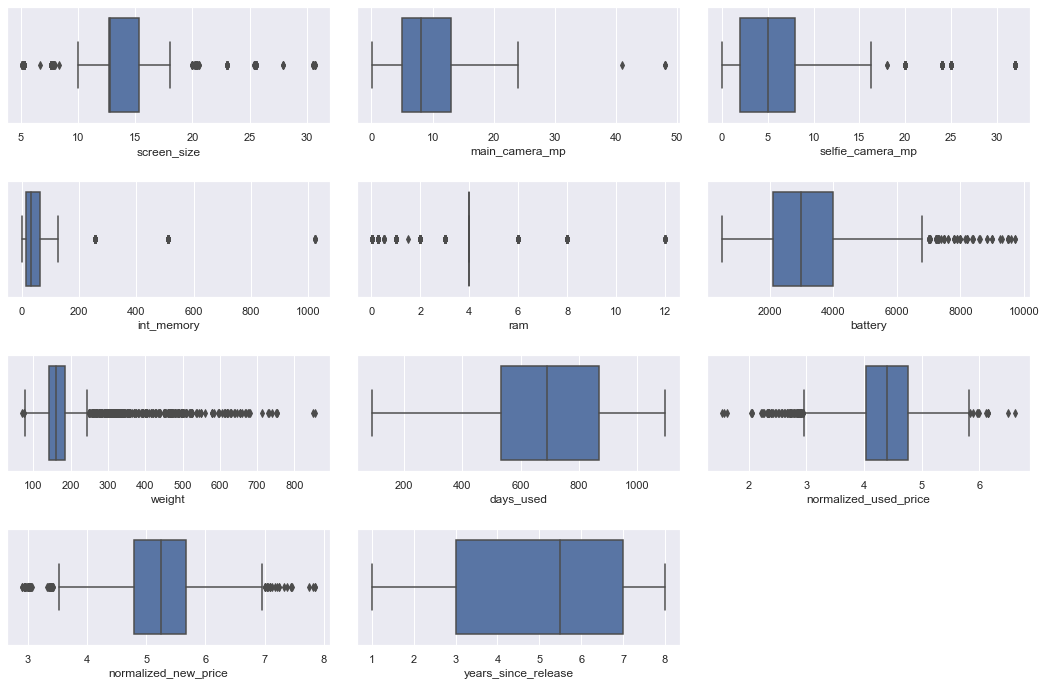

<IPython.core.display.Javascript object>

In [ ]:
# outlier detection using boxplot
num_cols = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df2, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* There are outliers in screen_size, main_camera_mp, selfie_camera_mp, ram, battery, weight, nominated used price, nominated_new_price

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [ ]:
# list of columns to treat for outliers
treat_cols = [
    "normalized_new_price",
    "battery",
    "int_memory",
    "selfie_camera_mp",
    "main_camera_mp",
    "screen_size",
]

<IPython.core.display.Javascript object>

* we will not treat outliers for ram as it can make it const that is why it is omitted

In [ ]:
# create a new data frame after treating outliers in the colums
df4 = treat_outliers_all(df2, treat_cols)

<IPython.core.display.Javascript object>

#### Checking one more time if all outliers were treated

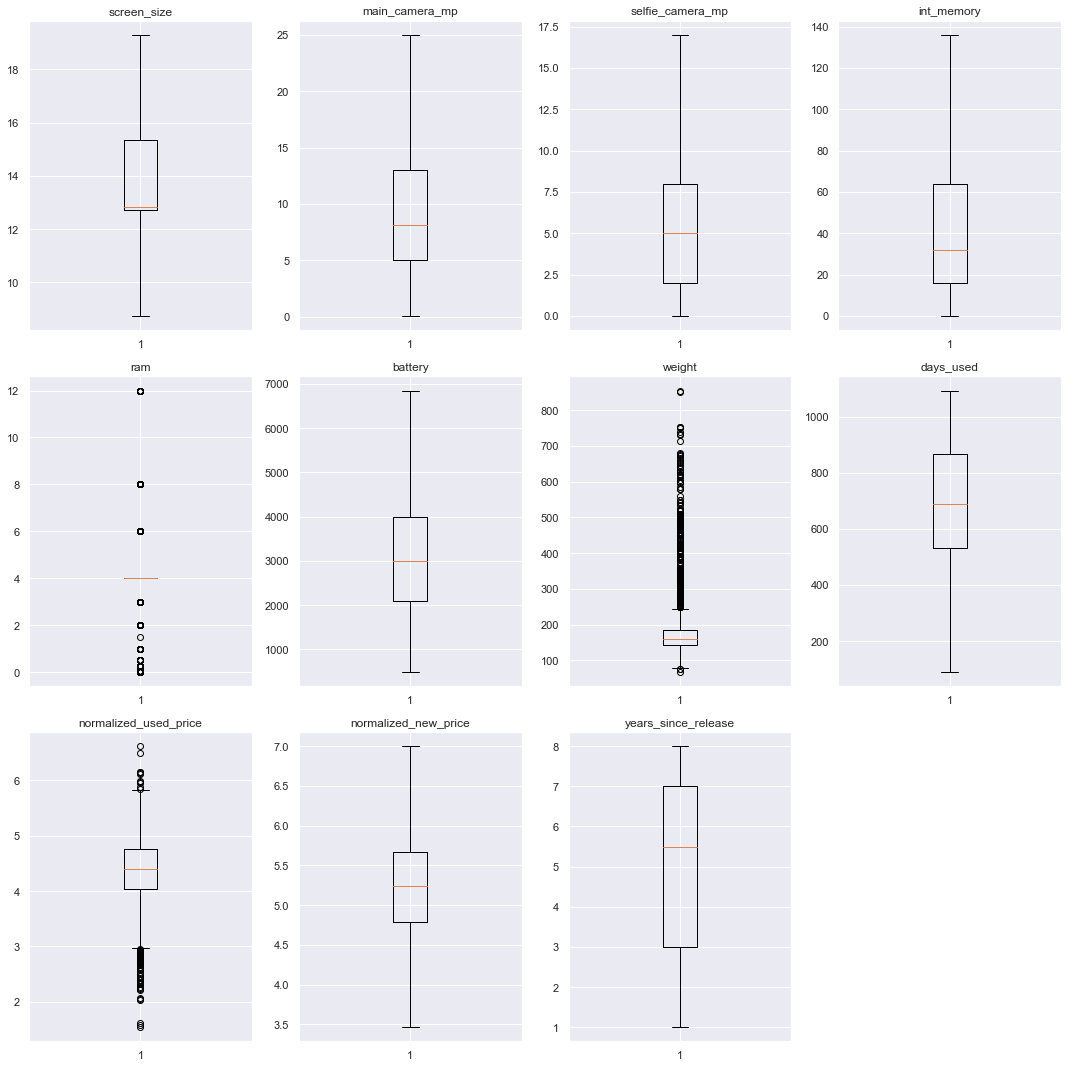

<IPython.core.display.Javascript object>

In [ ]:
# outlier detection using boxplot
num_cols = df4.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
df4.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.600805,4.575288,0.08,5.0,8.1,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.694033,39.076247,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.03608,1.364314,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3109.100898,1212.793754,500.0,2100.0,3000.0,4000.0,6850.0


<IPython.core.display.Javascript object>

In [ ]:
# check df2 has no missing values as required
df4.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
days_used                0
normalized_used_price    0
normalized_new_price     0
years_since_release      0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
df4["brand_name"].nunique()

34

<IPython.core.display.Javascript object>

* This column has very many categories(34) which means after creating dummies, very many columns will be formed
* This information in the brand name column can be grouped int os which column we already have and with fewer unique values
* That is why we will drop it

In [ ]:
df4.drop(["brand_name"], axis=1, inplace=True)
df4.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,480.0,345,5.135387,5.630961,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


<IPython.core.display.Javascript object>

### Data preparation for modeling


- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
# independent variables
X = df4.drop(["normalized_used_price"], axis=1)
# dependent variable
y = df4["normalized_used_price"]

print(X.head())
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        19.30  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   6850.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   years_since_release  
0                    1  
1                    1  
2                    1  
3                    1  
4              

<IPython.core.display.Javascript object>

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,0,0,0,1,1
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,480.0,345,5.630961,1,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,0,0,0,1,0


<IPython.core.display.Javascript object>

### We will now split X and y into train and test sets in a 70:30 ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
# print(X_train.head())
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     843.3
Date:                   Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                           04:11:35   Log-Likelihood:                 89.962
No. Observations:                   2417   AIC:                            -147.9
Df Residuals:                       2401   BIC:                            -55.28
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

### Interpretation of R-squared

* The R-squared value tells us that our model can explain 84% of the variance in the training set.

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.84**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.20**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of normalized_new_price is **0.40**.

### Model Performance Check

### Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and  𝑅2 .
* We will define a function to calculate MAPE and adjusted  𝑅2 .
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23313,0.181088,0.840474,0.839411,4.368342


<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240103,0.184505,0.840165,0.837657,4.525208


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict anime ratings within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% 

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

### TEST FOR MULTICOLLINEARITY

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,153.087466
1,screen_size,4.411303
2,main_camera_mp,2.199440
3,selfie_camera_mp,3.689172
4,int_memory,2.154543
5,ram,2.048668
6,battery,3.879278
7,weight,3.917417
8,days_used,2.589506
9,normalized_new_price,2.809015


<IPython.core.display.Javascript object>

* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* screen_size and years_since_release show moderate collinearity that is why we need to treet it

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [ ]:
col_list = ["screen_size", "years_since_release"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.838771,0.234420
1,screen_size,0.832856,0.238682


<IPython.core.display.Javascript object>

* Dropping screen_size will have greater impact on the predictive power of the model as compared to years_since_release.
* We'll drop years_since_release and check the VIF again.

In [ ]:
col_to_drop = "years_since_release"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,147.782627
1,screen_size,4.299009
2,main_camera_mp,2.194303
3,selfie_camera_mp,3.230815
4,int_memory,2.112388
5,ram,2.044087
6,battery,3.761516
7,weight,3.856681
8,days_used,1.896799
9,normalized_new_price,2.524958


<IPython.core.display.Javascript object>

* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables
* lets check the model summary again

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     898.8
Date:                   Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                           04:37:48   Log-Likelihood:                 84.151
No. Observations:                   2417   AIC:                            -138.3
Df Residuals:                       2402   BIC:                            -51.45
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations

* We can see that adj. R-squared is the same, which shows that the dropped columns did not have much effect on the model
* As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.


* So we will dropp  p-value > 0.05 such as battery, days_used, os_Windows, os_iOS and 5g_yes. So, they are not significant and we'll drop them all one at a time

In [ ]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'normalized_new_price', 'os_Others', '4g_yes']


<IPython.core.display.Javascript object>

In [ ]:
X_train3 = X_train2[selected_features]
X_test3 = x_test2[selected_features]

<IPython.core.display.Javascript object>

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     920.5
Date:                   Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                           04:39:56   Log-Likelihood:                 108.44
No. Observations:                   2417   AIC:                            -186.9
Df Residuals:                       2402   BIC:                            -100.0
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations

* Now no feature has p-value greater than 0.05.
Now adjusted R-squared is 0.843, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.842
This shows that the variables we dropped were not affecting the model


**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.857587,0.229900
1525,4.448399,4.630950,-0.182551
1128,4.315353,4.284655,0.030697
3003,4.282068,4.206282,0.075786
2907,4.456438,4.471857,-0.015419


<IPython.core.display.Javascript object>

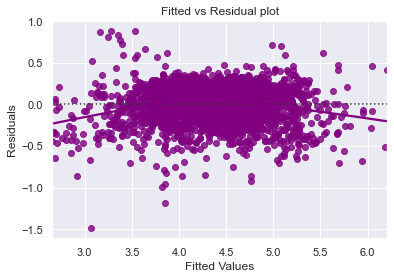

<IPython.core.display.Javascript object>

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

#### How to fix if this assumption is not followed?

We can apply transformations like log, exponential, arcsinh, etc. as per our data.

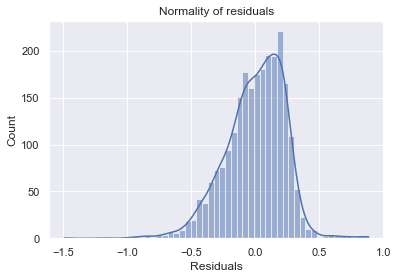

<IPython.core.display.Javascript object>

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals is left skewed.
* Let's check the Q-Q plot.

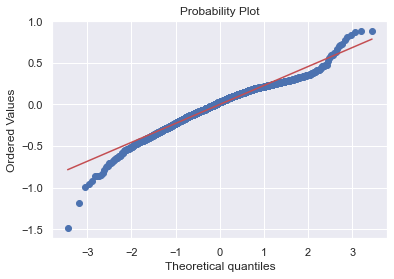

<IPython.core.display.Javascript object>

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line except for the tails.
Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9690737128257751, pvalue=2.0922976721838621e-22)

<IPython.core.display.Javascript object>

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
* So, the assumption is satisfied.

#### TEST FOR HOMOSCEDASTICITY

* Homoscedascity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0429497296678558), ('p-value', 0.23384741494006253)]

<IPython.core.display.Javascript object>

* Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

### Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.378782
2341,3.696103,3.965209
1913,3.592093,3.689679
688,4.306495,4.119883
650,4.522115,5.142009
2291,4.259294,4.399884
40,4.997685,5.435717
1884,3.875359,4.055065
2538,4.206631,4.048988
45,5.380450,5.278131


<IPython.core.display.Javascript object>

* We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

<IPython.core.display.Javascript object>

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     920.5
Date:                   Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                           04:48:27   Log-Likelihood:                 108.44
No. Observations:                   2417   AIC:                            -186.9
Df Residuals:                       2402   BIC:                            -100.0
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231354,0.181361,0.842895,0.841914,4.349522


<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236773,0.183136,0.844567,0.842283,4.459861


<IPython.core.display.Javascript object>

* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.45% error is low which is good

* Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

1. Increase in weight of device for 1 unit increase in price by 0.26 euro(weight mostly shows that the battery can lasts for longer working period during the day, as well as bigger screen)

2. Normalized_new_price has correlation with used price, that is why higher price for new device the higher price of the refurbished one

3. screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, normalized_new_price, weight_log ,4G have positive coefficient which shows us if they increase the price increase too.

So, the factors that influence the price of refurbished devices in the market are:

* Size of the screen of the devices
* RAM of the devices
* Operating system(os) 
* Internal memory
* Weight of the devices
* Whether it has 4G
* Main camera mega pixels
* Selfie camera pixels
* Price of the similar new device




### Recommendations

First of all retailers checks and repairing used phones, since it repaired there are no significant impact of critereas above influencing on the refurbished device, so all repared items can go to market. 

- 


___